In [1]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt

In [2]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

Enter keyword/hashtag to search about: bitcoin
Enter how many tweets to analyze: 30
How people are reacting on bitcoinby analyzing30Tweets.
neutral


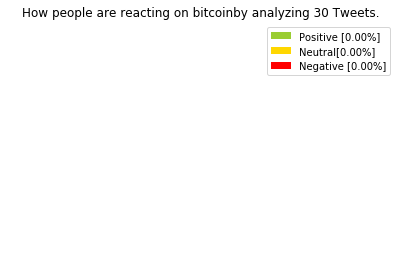

In [3]:
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm =      input("Enter keyword/hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)

positive = 0;
negative = 0;
neutral = 0;
polarity= 0;

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        neutral+= 1
        
    elif(analysis.sentiment.polarity < 0.00):
        negative+= 1
    elif(analysis.sentiment.polarity > 0.00):
        positive+= 1 
        
positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral,noOfSearchTerms)


positive = format(positive,'.2f')
neutral = format(neutral,'.2f')
negative = format(negative,'.2f')
print("How people are reacting on " + searchTerm + "by analyzing" + str(noOfSearchTerms) + "Tweets.")

if(polarity == 0):
   print("neutral")
    
elif(polarity < 0):
   print("Negative")
elif(polarity > 0):
   print("Positive")
    

labels = ['Positive ['+str(positive)+'%]', 'Neutral['+str(neutral) + '%]', 'Negative ['+ str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on '+searchTerm+'by analyzing '+str(noOfSearchTerms)+' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show() 


